# Homework 2 Part 1 - Solutions

This is an individual assignment.

---

Write your answers using markdown cells.

---

# Exercise 1 (9 points)

**Motivation:**

>**Waste minimization is a critical aspect of sustainable production practices, particularly in the manufacturing of consumer goods. As the global demand for products continues to rise, so does the generation of waste, posing significant environmental and economic challenges. The production of consumer goods involves numerous stages, from raw material extraction to manufacturing, packaging, and distribution. At each step, there is the potential for waste generation, leading to resource depletion, pollution, and increased costs. Addressing this issue and implementing effective waste minimization strategies is essential to mitigate the environmental impact, conserve resources, and optimize production processes, all while maintaining profitability and meeting consumer expectations.**

**Suppose your company is in the business of manufacturing consumer goods products and that you are interested in minimizing waste production. Instead of producing a large number of items at any given time, design a strategy to determine how many products should be manufactured at any given time to minimize waste production.**

1. (2 points) **The dataset $\mathbf{X}=\{x_i\}_{i=1}^N$ is comprised of $N$ samples $x_i$ which represent the "number of products to be produced in a given interval of time". Which random variable (RV) best describes sample $x_i$? With that, define the observed data likelihood for the dataset.**

Let $X$ be the random variable to model the number of items produced at any given time. This RV is best modeled with a Poisson random variable with rate parameter $\lambda$. 

The observed data likelihood can be written as:

\begin{align*}
\mathcal{L}^0 = \prod_{i=1}^N P(x_i|\lambda) = \prod_{i=1}^N \frac{\lambda^{x_i}e^{-\lambda}}{x_i!}
\end{align*}

2. (3 points) **Solve for the parameter of the observed data likelihood using the MLE approach.**

The solution for $\lambda$ can be found by differentiating the log-data likelihood. The log-data likelihood, $\mathcal{L}$, is:

\begin{align*}
\mathcal{L} &= \ln \mathcal{L}^0 = \sum_{i=1}^N \left( x_i\ln\lambda -\lambda - \ln x_i! \right)
\end{align*}

Differentiating it wrt $\lambda$, we find:

\begin{align*}
\frac{\partial\mathcal{L}}{\partial\lambda} = 0 \iff \sum_{i=1}^N \left( x_i\frac{1}{\lambda} -1 \right) = 0 \iff
\lambda_{\text{MLE}} = \frac{\sum_{i=1}^N x_i}{N}
\end{align*}

3. (1 point) **Can you introduce a prior probability for the parameter of the data likelihood such that it forms a conjugate prior relationship?**

Yes, we can introduce a Gamma distribution on the parameter $\lambda$. This distribution has 2 hyperparameters, $\alpha$ and $\beta$. The prior can be written as:

\begin{align*}
P(\lambda|\alpha,\beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta \lambda}
\end{align*}

Using the MAP approach, the observed data likelihood can be written as:

\begin{align*}
\mathcal{L}^0 &= \left(\prod_{i=1}^N P(x_i|\lambda) \right)P(\lambda|\alpha,\beta)\\
&= \left(\prod_{i=1}^N \frac{\lambda^{x_i}e^{-\lambda}}{x_i!}\right) \frac{\beta^{\alpha}}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta \lambda}\\
&= \left(\prod_{i=1}^N \frac{1}{x_i!} \right) \frac{\beta^{\alpha}}{\Gamma(\alpha)}\lambda^{\alpha + \sum_{i=1}^N x_i -1}e^{-(\beta +N) \lambda}\\
&\propto \lambda^{\alpha + \sum_{i=1}^N x_i -1}e^{-(\beta +N) \lambda}\\
&\propto \text{Gamma}\left(\lambda \Big| \alpha + \sum_{i=1}^N x_i, \beta +N\right)
\end{align*}

We see that the posterior is also a Gamma, thus Poisson-Gamma form a conjugate prior relationship.

4. (3 points) **Solve for the parameter of the observed data likelihood using the MAP approach for the prior probability on the parameter you selected in part 3.**

The solution for $\lambda$ can be found by differentiating the log-data likelihood. The log-data likelihood, $\mathcal{L}$, is:

\begin{align*}
\mathcal{L} &= \ln \mathcal{L}^0 = \left(\alpha + \sum_{i=1}^N x_i -1\right)\ln\lambda -(\beta +N) \lambda
\end{align*}

Differentiating it wrt $\lambda$, we find:

\begin{align*}
\frac{\partial\mathcal{L}}{\partial\lambda} = 0 \iff \left(\alpha + \sum_{i=1}^N x_i -1\right)\frac{1}{\lambda} -(\beta +N) = 0 \iff \lambda_{\text{MAP}} = \frac{\sum_{i=1}^N x_i + \alpha -1}{N+\beta}
\end{align*}

---

# Exercise 2 (8 points)

**Consider a training set containing positive natural numbers - including zero - ($x\in\mathbb{N}_0$) for 2 classes, $C_0$ and $C_1$. The training set has 100 samples for class $C_0$ and 50 for $C_1$.**

**Suppose that you have reason to believe that samples belonging from $C_0$ are drawn from a Poisson random variable with parameter $\lambda>0$, and samples belonging to $C_1$ are drawn from a Binomial random variable with parameters $n\in\mathbb{N}_0$ and $p\in[0,1]$. In other words:**

\begin{align*}
    p(x|C_0) &= \frac{\lambda^x e^{-\lambda}}{x!}\\
    p(x|C_1) &= \begin{pmatrix}n\\x\end{pmatrix} p^x (1-p)^{n-x}
\end{align*}

**where $\begin{pmatrix}n\\x\end{pmatrix} = \frac{n!}{x!(n-x)!}$ is the binomial coefficient of "$n$ choose $x$".**

**Consider $\lambda=2$, $n=10$ and $p=0.5$. Consider the test point $x=3$. Use the Naive Bayes classifier, to assign $x=3$ to $C_0$ or $C_1$? Show your work.**

The prior probability for each class can be estimated as its relative frequency in the training set, namely

\begin{align*}
    p(C_1) = \frac{100}{150}=\frac{2}{3} \text{ and } p(C_2) = \frac{50}{150}=\frac{1}{3}
\end{align*}

For the provided parameter values, the data likelihood for class 1 and class 2 are defined as:

\begin{align*}
    p(x|C_0) &= \frac{2^3 e^{-2}}{3!} = \frac{4e^{-2}}{3} \\
    p(x|C_1) &= \begin{pmatrix}10\\3\end{pmatrix} 0.5^3 (1-0.5)^{10-2} = \frac{120}{2^{10}}
\end{align*}

For the test point $x=3$, we compute the posterior probability with
\begin{align*}
    P(C_k|x=3) &= \frac{p(x=3|C_k) p(C_k)}{p(x=3)} = \frac{p(x=3|C_k) p(C_k)}{\sum_{j=1}^2 p(x=3|C_j) p(C_j)}
\end{align*}

We now find:

\begin{align*}
    P(C_0|x=3) &= \frac{\frac{4e^{-2}}{3}\times\frac{2}{3}}{\frac{4e^{-2}}{3}\times\frac{2}{3} + \frac{120}{2^{10}}\times\frac{1}{3}} \approx 0.755\\
    P(C_1|x=3) &= \frac{\frac{120}{2^{10}}\times\frac{1}{3}}{\frac{4e^{-2}}{3}\times\frac{2}{3} + \frac{120}{2^{10}}\times\frac{1}{3}} \approx 0.245
\end{align*}

Since $P(C_0|x=3) > P(C_1|x=3)$ then the test point $x=3$ is assigned to class $C_0$.

In [1]:
from scipy.special import binom

y0 = 4*np.exp(-2)/3
y1 = binom(10,3)/(2**10)

p0 = 2/3
p1 = 1-p0

pos0 = (y0*p0) / (y0*p0 + y1*p1)
pos1 = (y1*p1) / (y0*p0 + y1*p1)

pos0, pos1

(0.7548797050821854, 0.24512029491781465)

---

# Exercise 3 (8 points)

**Consider a Naive Bayes classifier for a binary classification task in a two-dimensional feature space with $P(\mathbf{x}|C_1) \sim G \left(\mu_1, \Sigma_1 \right)$, $P(\mathbf{x}|C_2)\sim G\left(\mu_2, \Sigma_2\right)$ and $P(C_1)=P(C_2)=\frac{1}{2}$, where $\mathbf{x}=\begin{bmatrix}x_1\\x_2\end{bmatrix}$ is a sample observation, $\mu_i$ is the $2\times 1$ mean vector for class $C_i$ and $\Sigma_i$ is the $2\times 2$ covariance matrix for class $C_i$.**

**Let $g_i(x) = \ln(P(\mathbf{x}|C_i)P(C_i))$ be the discriminant function for class $C_i$. Then, let $g(\mathbf{x}) = g_1(\mathbf{x})-g_2(\mathbf{x})$. Using the Bayesian decision theory we find:**

\begin{align*}
&\textbf{Choose}\;\; C_1 \;\; \textbf{if} \;\; g(\mathbf{x})>0\\
&\textbf{Choose} \;\; C_2 \;\; \textbf{otherwise}
\end{align*}

1. (4 points) **Let $\mu_1=\begin{bmatrix}0\\0\end{bmatrix}$, $\mu_2=\begin{bmatrix}1\\1\end{bmatrix}$ and $\Sigma_1=\Sigma_2=\mathbf{I}$. Find $g(\mathbf{x})$ and show all your work. What is the shape of the decision boundary?**.

To compute the data likelihoods, we need to determine the inverse of the covariance matrix. Since they are both the identity matrix $\Sigma_1=\Sigma_2=\mathbf{I}$, we know that $\Sigma_1^{-1}=\Sigma_2^{-1}=\mathbf{I}^{-1}=\mathbf{I}$.

The discriminant function $g_i(x)$, $i=1,2$ is defined as $P(x|C_i)P(C_i)$. We can simplify it by taking $g_i(x)=\ln(P(x|C_i)P(C_i))$. Note that $x=[x_1,x_2]^T$.We have:

\begin{align*}
g_1(x) &= \ln\left(\frac{1}{2}\times\frac{1}{(2\pi)^{2/2}|\Sigma_1|^{1/2}} \exp\left\{-\frac{1}{2}x^T\Sigma_1^{-1}x\right\}\right) \\
& = \ln\left(\frac{1}{2}\right) - \ln(2\pi) - \frac{1}{2}x^Tx\\
& = \ln\left(\frac{1}{2}\right) - \ln(2\pi) - \frac{1}{2}(x_1^2+x_2^2)
\end{align*}

and 

\begin{align*}
g_2(x) &= \ln\left(\frac{1}{2}\times\frac{1}{(2\pi)^{2/2}|\Sigma_2|^{1/2}} \exp\left\{-\frac{1}{2}(x-1)^T\Sigma_2^{-1}(x-1)\right\}\right) \\
& = \ln\left(\frac{1}{2}\right) - \ln(2\pi) - \frac{1}{2}(x-1)^T(x-1)\\
& = \ln\left(\frac{1}{2}\right) - \ln(2\pi) - \frac{1}{2}((x_1-1)^2+(x_2-1)^2)\\
& = \ln\left(\frac{1}{2}\right) - \ln(2\pi) - \frac{1}{2}(x_1^2 + x_2^2 - 2x_1 - 2x_2 +2)
\end{align*}

Now, let $g(x) = g_1(x)-g_2(x)$, we find:

\begin{align*}
g(x) &= -\frac{1}{2}(-2x_1 -2x_2 +2) = x_1 + x_2 -1
\end{align*}

Thus, we decide $C_1$ if $g(x)>0 \iff x_2>-x_1 +1$. As expected, this discriminant function passes through the midpoint of the two means $[0.5,0.5]^T$ since the two categories have the same prior and covariance matrices.

We can visualize this decision boundary as follows:

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Useful Function

def discriminant_fct(X1, X2, p1, x, g, display=True):
    # grid for plotting
    xm, ym = np.meshgrid(x, x)
    X = np.flip(np.dstack([xm,ym]),axis=0)

    # daata likelihoods
    y1 = X1.pdf(X) #P(x|C1)
    y2 = X2.pdf(X) #P(x|C2)
    # visualize data likelihoods
    fig =plt.figure(figsize=(12,5))
    fig.add_subplot(1,2,1)
    plt.imshow(y1, extent=[min(x),max(x),min(x),max(x)])
    plt.colorbar(); plt.title('$P(x|C_1)$', size=20)
    plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
    plt.xticks(fontsize=15); plt.yticks(fontsize=15)
    fig.add_subplot(1,2,2)
    plt.imshow(y2, extent=[min(x),max(x),min(x),max(x)])
    plt.colorbar(); plt.title('$P(x|C_2)$', size=20)
    plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
    plt.xticks(fontsize=15); plt.yticks(fontsize=15)

    # priors
    p2 = 1-p1
    # posterior probability
    pos1 = (y1*p1)/(y1*p1 + y2*p2) # P(C1|x)
    pos2 = (y2*p2)/(y1*p1 + y2*p2) # P(C2|x)
    
    # visualize discriminant function with posterior
    plt.figure(figsize=(8,5))
    plt.imshow(pos1-pos2>0, extent=[min(x),max(x),min(x),max(x)])
    if display:
        plt.plot(x, g, 'r', label='Discriminant function')
        plt.legend()
    plt.colorbar();
    plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
    plt.title('Region to Decide Class 1');

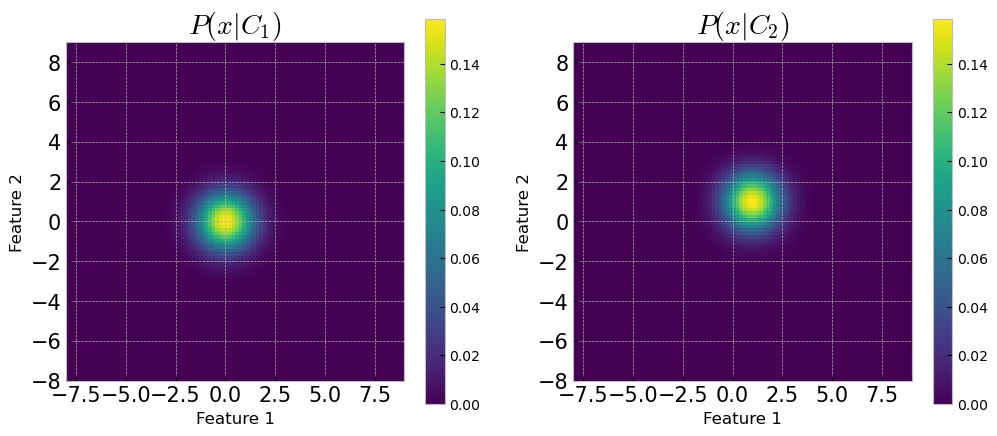

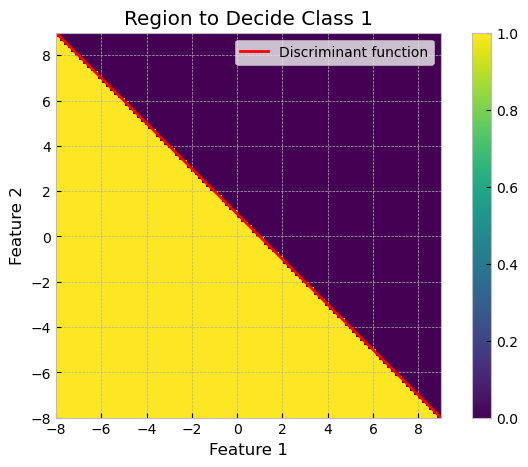

In [3]:
X1 = stats.multivariate_normal(mean=[0,0], cov=np.eye(2))
X2 = stats.multivariate_normal(mean=[1,1], cov=np.eye(2))
p1=1/2
x = np.linspace(-8,9,100)
g = -x + 1
discriminant_fct(X1, X2, p1, x, g)

2. (4 points) **Let $\mu_1=\begin{bmatrix}0\\0\end{bmatrix}$, $\mu_2=\begin{bmatrix}1\\1\end{bmatrix}$, $\Sigma_1=\begin{bmatrix}2 & 0.5\\0.5 & 2\end{bmatrix}$ and $\Sigma_2=\begin{bmatrix}5 & 4\\4 & 5\end{bmatrix}$. Find $g(\mathbf{x})$ and show all your work. What is the shape of the decision boundary?**.

To compute the data likelihoods, we need to determine the inverse of the covariance matrix. We have $\Sigma_1^{-1} = \begin{bmatrix}8/15 & -2/15 \\ -2/15 & 8/5\end{bmatrix}$ and $\Sigma_2^{-1} = \begin{bmatrix}5/9 & -4/9 \\ -4/9 & 5/9\end{bmatrix}$. Moreover, the determinants are $|\Sigma_1| = \frac{15}{4}$ and $|\Sigma_2| = 9$.

The discriminant function $g_i(x)$, $i=1,2$ is defined as $P(x|C_i)P(C_i)$. We can simplify it by taking $g_i(x)=\ln(P(x|C_i)P(C_i))$. Note that $x=[x_1,x_2]^T$.We have:

\begin{align*}
g_1(x) &= \ln\left(\frac{1}{2}\times\frac{1}{(2\pi)^{2/2}|\Sigma_1|^{1/2}} \exp\left\{-\frac{1}{2}x^T\Sigma_1^{-1}x\right\}\right) \\
& = \ln\left(\frac{1}{2}\right) - \ln(2\pi) -\frac{1}{2}\ln\left(\frac{15}{4}\right) - \frac{1}{2}x^T\Sigma_1^{-1}x\\
& = \ln\left(\frac{1}{2}\right) - \ln(2\pi) -\frac{1}{2}\ln\left(\frac{15}{4}\right) - \frac{1}{2}\left(\frac{8}{15}x_1^2-\frac{2}{15}x_1x_2 -\frac{2}{15}x_1x_2 + \frac{8}{15}x_2^2\right)\\
& = \ln\left(\frac{1}{2}\right) - \ln(2\pi) -\frac{1}{2}\ln\left(\frac{15}{4}\right) - \frac{1}{2}\left(\frac{8}{15}x_1^2-\frac{4}{15}x_1x_2 + \frac{8}{15}x_2^2\right)
\end{align*}

and

\begin{align*}
g_2(x) &= \ln\left(\frac{1}{2}\times\frac{1}{(2\pi)^{2/2}|\Sigma_2|^{1/2}} \exp\left\{-\frac{1}{2}(x-1)^T\Sigma_2^{-1}(x-1)\right\}\right) \\
& = \ln\left(\frac{1}{2}\right) - \ln(2\pi) -\frac{1}{2}\ln(9) - \frac{1}{2}(x-1)^T\Sigma_2^{-1}(x-1)\\
& = \ln\left(\frac{1}{2}\right) - \ln(2\pi) -\frac{1}{2}\ln(9)) - \frac{1}{2}\left(\frac{5}{9}(x_1-1)^2 -\frac{4}{9}(x_1-1)(x_2-1) -\frac{4}{9}(x_1-1)(x_2-1)+\frac{5}{9}(x_2-1)^2\right)
\end{align*}

Let $g(x) = g_1(x)-g_2(x)$. After some simplification, we find:

\begin{align*}
g(x) &= x_1^2 + x_2^2 -28x_1x_2 -10x_1 - 10x_2 +50
\end{align*}

which consists of two hyperbolas.

Thus, we decide $C_1$ if $g(x)>0$.

We can visualize this decision boundary as follows:

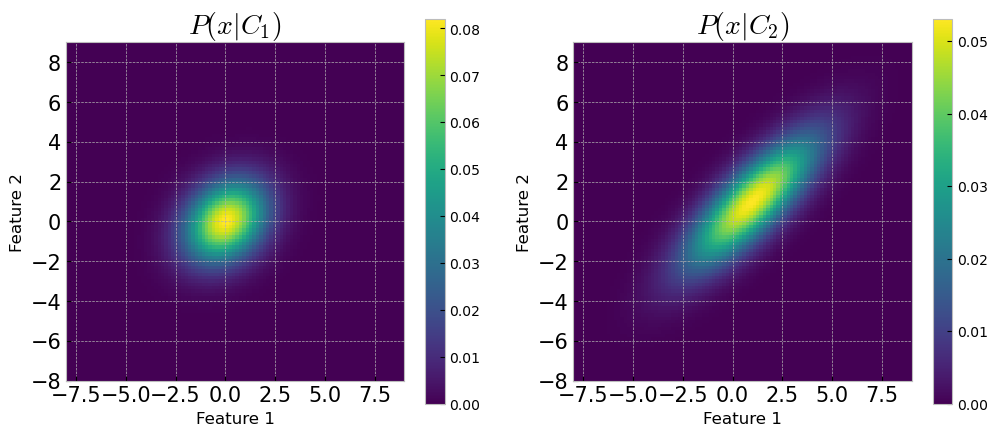

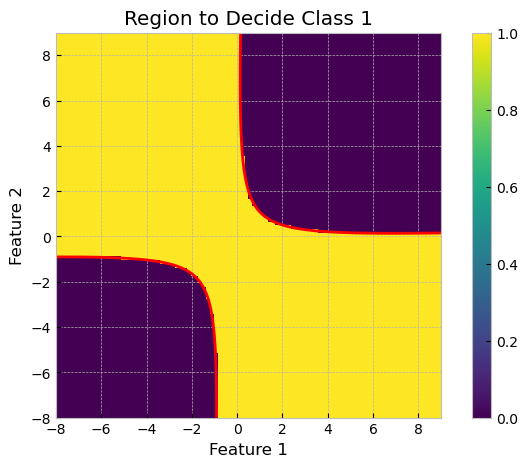

In [4]:
X1 = stats.multivariate_normal(mean=[0,0], cov=[[2,0.5],[0.5,2]])
X2 = stats.multivariate_normal(mean=[1,1], cov=[[5,4],[4,5]])
p1=1/2
x = np.linspace(-8,9,100)
x1, x2 = np.meshgrid(x, x)
discriminant_fct(X1, X2, p1, x, 0, False)
plt.contour(x1, x2, x1**2 + x2**2 -28*x1*x2 -10*x1 - 10*x2 + 50, [1], colors='r');

---

# Exercise 4 (8 points)

**Consider the a dataset composed of two classes (class 1 and class 2) in a 2-dimensional feature space. Each class has 100 samples. This is what the data looks like:**

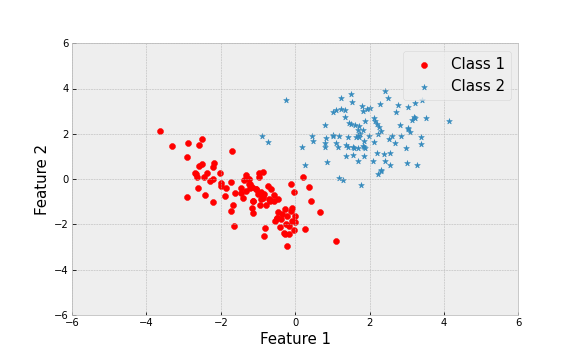

In [5]:
from IPython.display import Image
Image('figures/Dataset.png',width=500)

**Answer the following questions:**

1. (2 points) **The four plots below (A, B, C and D) represent contours plots of the data likelihood as modeled with a Gaussian distribution. from the four plots, select one that represents the data of class 1, and another that represents the data in class 2. Justify your answer.**

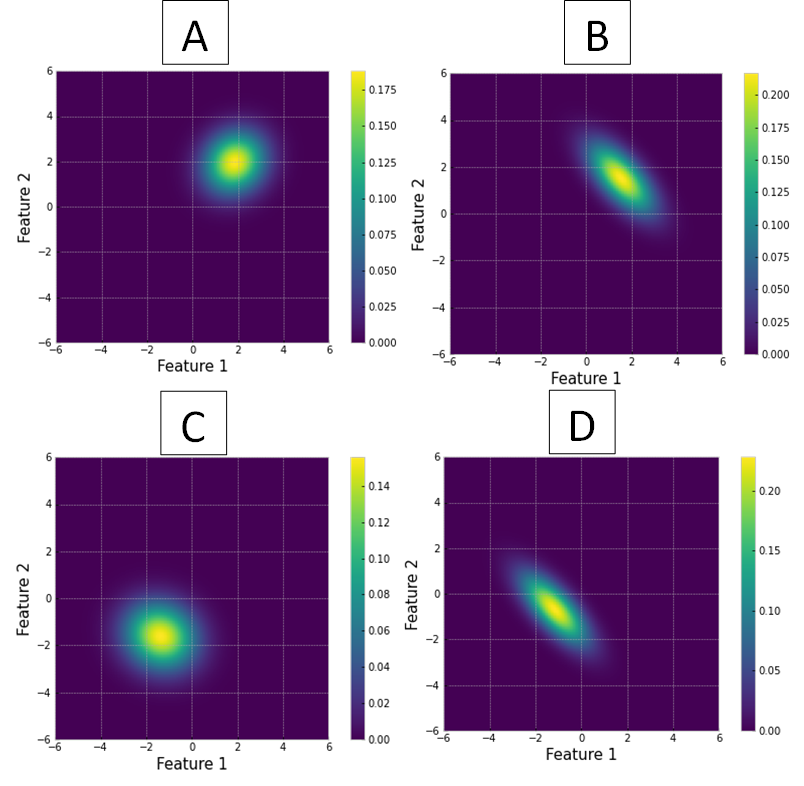

In [6]:
Image('figures/DataLikelihoods.png',width=600)

* Class 1: the data has approximately a sample mean of $[-1,-1]$ and an elliptical covariance matrix with negative correlation between features 1 and 2. The best contour fitting this description is surface D.

* Class 2: the data has approximately a sample mean of $[2,2]$ and a circular covariance matrix with approximately zero correlation between features 1 and 2. The best contour fitting this description is surface A.

2. (2 points) **Suppose we want to implement the Naive Bayes Classifier on this training data. What is the prior probability for each class?**

Each class has 100 samples. We can consider the prior as the relative frequency for each class, therefore the prior for class 1 and class 2 are $\frac{100}{100+100}$ or $\frac{1}{2}$.

3. (2 points) **Suppose that we implemented the Naive Bayes Classifier using the prior probabilities you computed in part (2). The three plots below (i, ii and iii) represent the decision surface for deciding class 1 (red class). Based on the plotting of the data, the data likelihoods selected from part (1) and the priors from part (2), which of the following plots corresponds to the true decision surface for deciding class 1? Justify your answer.**

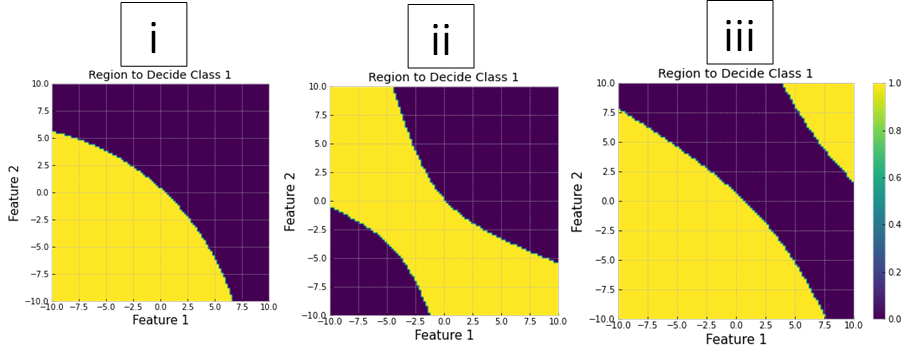

In [7]:
Image('figures/DecisionSurfaces.png',width=900)

Decision surface ii corresponds to the decision surface for deciding class 1, because (1) the sample mean is included in the region to decide class 1, and (2) the decision surface shows that the data likelihood has less uncertainty along approximately $130^{\circ}$.

4. (2 points) **Using the Naive Bayes decision surface you selected in part (3), which class are the test points $x_1=[-1,-1]$ and $x_2=[-10,10]$ going to be assigned as? How confident would you be in that decision? Justify your answer.**

Point $x_1=[-1,-1]$ will be classified as class 1. This decision will fit very well within the data likelihood, so the confidence is large.

Point $x_2=[-10,10]$ will be classified as class 1. But its likelihood will be must smaller so we will not be as confident in that decision.

---

# Exercise 5 (12 points)

**For each statement below, state whether it is true (T) or false (F) and provide a justification for your answer.**

1. (1 point) **Minimizing the Least Squares objective function with a weight decay term (regularizer) is equivalent to maximizing the data likelihood with a prior on the weights.**

*True.* We can show this analytically. Consider the least squares objective function below with a ridge regularizer:

\begin{align*}
J(\mathbf{w}) = \frac{1}{2}\sum_{i=1}^N (t_i - y_i)^2 + \frac{\lambda}{2}\sum_{j=0}^M w_j^2
\end{align*}

The solution for the parameters $\mathbf{w}$ is found by optimizing $J(\mathbf{w})$:

\begin{align*}
\arg_{\mathbf{w}} \min J(\mathbf{w}) &= \arg_{\mathbf{w}} \max - J(\mathbf{w})\\
&= \arg_{\mathbf{w}} \max \exp\left(-J(\mathbf{w})\right)\\
&= \arg_{\mathbf{w}} \max \exp\left(-\frac{1}{2}\sum_{i=1}^N \left(t_i - y_i\right)^2 - \frac{\lambda}{2} \sum_{j=0}^M w_j^2\right)\\
&= \arg_{\mathbf{w}} \max \prod_{i=1}^N\exp\left(-\frac{1}{2} \left(t_i - y_i\right)^2\right)\prod_{j=0}^M\exp\left(-\frac{\lambda}{2} w_j^2\right)\\
&\propto \arg_{\mathbf{w}} \max \prod_{i=1}^N \mathcal{N}\left(t_i;y_i,1\right)\prod_{j=0}^M \mathcal{N}\left(w_j;0, \frac{1}{\lambda}\right)\\
&= \arg_{\mathbf{w}} \max p(\mathbf{t}| \mathbf{y}(\mathbf{x};\mathbf{w})) p(\mathbf{w}| \lambda)\\
&\propto \arg_{\mathbf{w}} \max p(\mathbf{w}| \mathbf{t})
\end{align*}

We see that adding a regularization penalty term to the objective function is equivalent to adding a prior probability on the parameters. 

For the ridge penalty, the probabilistic model of the prior probability is a Gaussian distribution with mean 0 and variance $1/\lambda$. 

2. (1 point) **The observed data likelihood on $N$ i.i.d. samples $x_i$ (where $x_i\geq0, \forall i$) with a Gamma distribution, $P(x|\alpha,\beta)=\frac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x}$, and a prior probability on parameter $\beta$ as another Gamma distribution, $P(\beta|a,b)=\frac{b^a}{\Gamma(a)}\beta^{a-1}e^{-b \beta}$, form a Conjugate Prior relationship.**

*True.* This has been shown in problem 1 of HW2-P1.

3. (1 point) **In MLE estimation we are optimizing the posterior distribution.**

*False.* The Maximum Likelihood Estimation (MLE) finds the parameters of the observed data likelihood in a data-driven approach without any prior assumption on the parameters.

4. (1 point) **Consider $\theta_{\text{MLE}} = \arg_{\theta} \max P(X|\theta)$ and $\theta_{\text{MAP}} = \arg_{\theta} \max P(X|\theta)P(\theta)$. We have that $\theta_{\text{MLE}} = \theta_{\text{MAP}}$ for uniform-distributed priors.**

*True.* We can show this analytically:

\begin{align*}
\theta_{\text{MAP}} =& \arg_{\mathbf{w}} \min P(X|\theta)P(\theta) \\
=& \arg_{\mathbf{w}}\min \begin{cases} P(X|\theta)\frac{1}{b-a}, & \text{if }X\text{ is continuous RV and }X\sim U(a,b)\\ P(X|\theta)\frac{1}{b-a+1}, & \text{if }X\text{ is discrete RV and }X\sim U(a,b) \end{cases}\\
&\; \\
& \text{since }a\text{ and }b\text{ are constants (in either discrete or continuous cases), then }\\
& \; \\
=& \arg_{\mathbf{w}}\min P(X|\theta)\\
=& \theta_{\text{MLE}}
\end{align*}

5. (1 point) **The EM algorithm guarantees convergence to the global optima solution.**

*False.* The EM algorithm is an alternating optimization algorithm that requires a random initialization of the parameters. Different initializations will result in different solutions.

6. (1 point) **The latent variables $z$ in the EM algorithm are discrete random variables.**

*False.* The latent variables $z$ can be discrete or continuous random variables. In the censored data example in lecture 9, the latent variables were continuous.

7. (1 point) **We can use the EM algorithm to optimize a Gamma mixture model, $P(x) = \sum_{k=1}^K \pi_k \Gamma\left(x|\nu_k,\theta_k\right)$ to a set of $N$ i.i.d. samples $\{x_i\}_{i=1}^N$.**

*True.* Mixture models can be the sum of $K$ components, and each component can take any shape.

8. (1 point) ~~**The MLE solution for the parameter $\theta_k$ in the Gamma mixture model is $\theta_k = \frac{\nu_k \sum_{i=1}^N C_{ik}}{\sum_{i=1}^N x_i C_{ik}}$.**~~

9. (1 point) **A Gaussian Mixture Model can be used to find cluster groups in the data.**

*True.* Optimizing GMMs with the EM algorithm is an unsupervised learning approach. For a given dataset, we can learn $K$ components that best represent the dataset. This is a form of clustering. In this context, the latent variables $z$ correspond to the cluster labels ($z\in\{1,2,\dots,K\}$).

10. (1 point) ~~**Consider the training dataset (left) and the clustering results with 2 clusters (right) depicted in the figure below. Both GMM and the standard K-Means clustering algorithms could have produced the clustering results for $K=2$.**~~

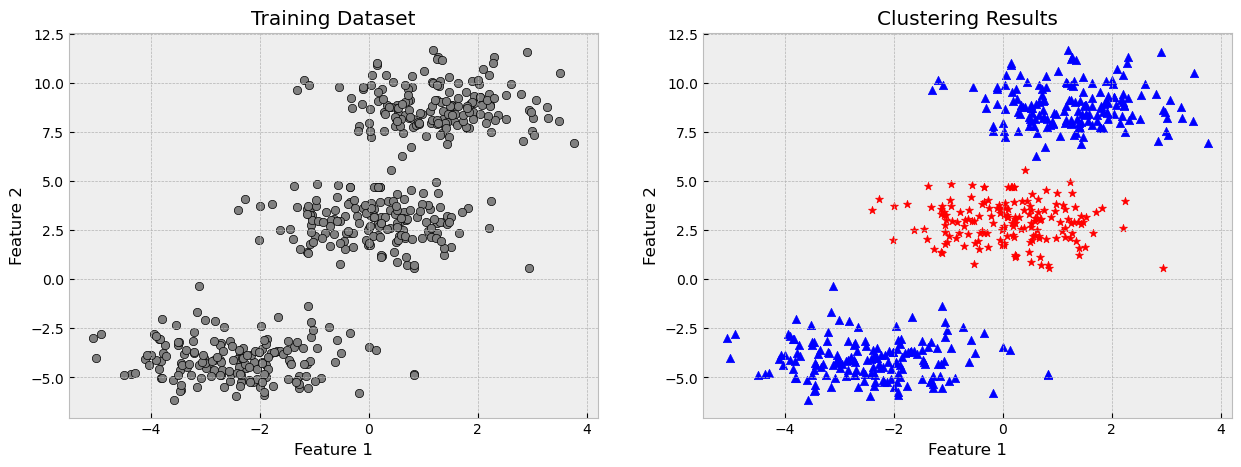

In [48]:
Image('figures/clustering_results.png', width=900)

11. (1 point) ~~**The K-Means clustering algorithm can handle clusters with varying densities, non-convex clusters and imbalanced cluster sizes.**~~

12. (1 point) ~~**The rand index of the clustering results (left) and the respective ground truth (right) as depicted below would be 1.**~~

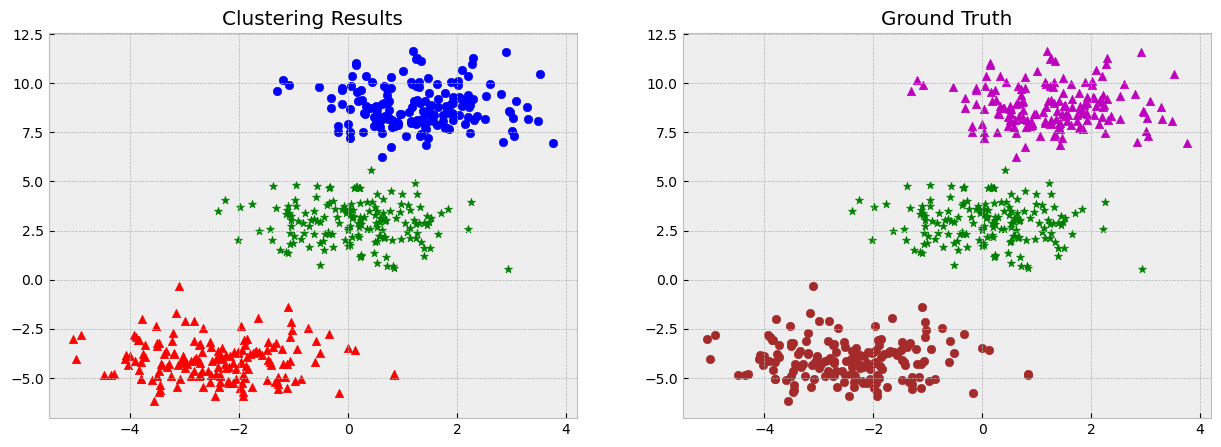

In [57]:
Image('figures/clustering_ground_truth.png', width=900)

---

# On-Time (5 points)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___